Welcome to this interactive python session. This should be considered supplementary content to the chapter. We would strongly advise you to read the chapter before trying the hands-on sessions. 

This session will look at downsampling, aliasing and upsampling. 

We encourage you to play around with the numbers and the images as much as possible to get a good feel for the topic. Come to your own conclusions and let us know if you observe some interesting behaviour!

First we import modules

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Now lets generate a 500x500 pixel image with differing frequencies. 

In [0]:
x = np.arange(500) / 500 - 0.5
y = np.arange(500) / 500 - 0.5

X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
f0 = 15
k = 250
funct = np.sin(np.pi * 2 * (f0 * R + k * R**2 / 2))

The images produced below are a result of subsampling to produce an image of 303x303 pixels. The Moire patterns we notice in 'nearest' interpolation is due to aliasing where the high frequencies cannot be distinguished from the lower frequencies. The 'antialiased' image still has a moire pattern, however it is much less prominent. Finally, we see the 'gaussian' image which has the least aliasing. 

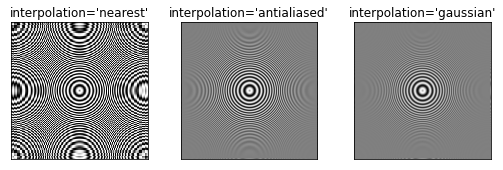

In [0]:
fig, axs = plt.subplots(1, 3, figsize=(7, 4), subplot_kw={'xticks': [], 'yticks': []}, constrained_layout=True)

for ax, interpolate in zip(axs, ['nearest', 'antialiased', 'gaussian']):
    ax.imshow(funct, interpolation=interpolate, cmap='gray')
    ax.set_title(f"interpolation='{interpolate}'")
   
plt.show()

Now lets look at upsampling. Upsampling an image with 'nearest' interpolation will result in Moire patterns if the upsampling factor is not an integer. Additionally, 'nearest' interpolation stretches the image locally, resulting in distortion. The image produced upsamples 500x500 pixels to 530x530. 

You might have noticed the grid of 30 line like artifacts. This is due to the extra 24 pixels [524 - 500] that need to be generated. 

I encourage you to try different upsampling factors!

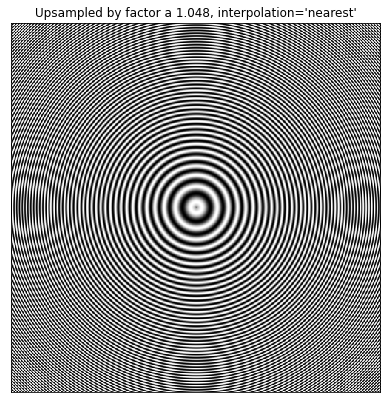

In [0]:
fig, ax = plt.subplots(figsize=(6.8, 6.8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(funct, interpolation='nearest', cmap='gray')
ax.set_title("Upsampled by factor a 1.048, interpolation='nearest'")
plt.show()

We can use better anti-aliasing algorithms to reduce the Moire efect when upsampling. This is very similar to what we saw while performing downsampling. Here 'antialiased' uses the default 'hanning' antialiasing method. 

I encourage you to try different interpolation methods to figure out which interpolation method is best. However note that each methods performance depends on the patterns in the image itself. 

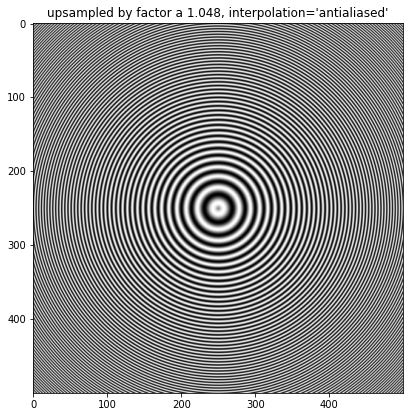

In [0]:
fig, ax = plt.subplots(figsize=(6.8, 6.8))
ax.imshow(funct, interpolation='antialiased', cmap='gray')
ax.set_title("upsampled by factor a 1.048, interpolation='antialiased'")
plt.show()

This shows all the possible options you can use for interpolation. 'None' defaults to 'antialiasing' whereas 'none' performs no interpolation. 

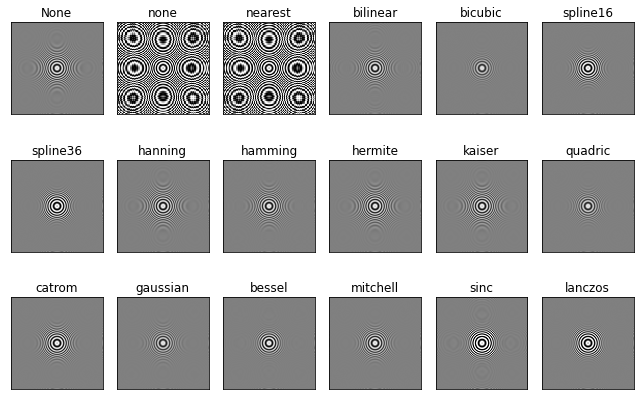

In [0]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(funct, interpolation=interp_method, cmap='gray')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()